Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

Visualização da informações para analisar se todos os dados estão listados corretamente

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


"TotalCharges" está listado como Object, precisamos fazer um conversão disso para um valor númerico

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Como forçamos uma conversão, alguns dados vão aparecer como nulos

In [8]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Vamos remover essas linhas

In [11]:
df = df.dropna(subset=['TotalCharges'])
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# 2. Visualização

Com os dados limpos, vamos ver os gráficos para encontrar padrões

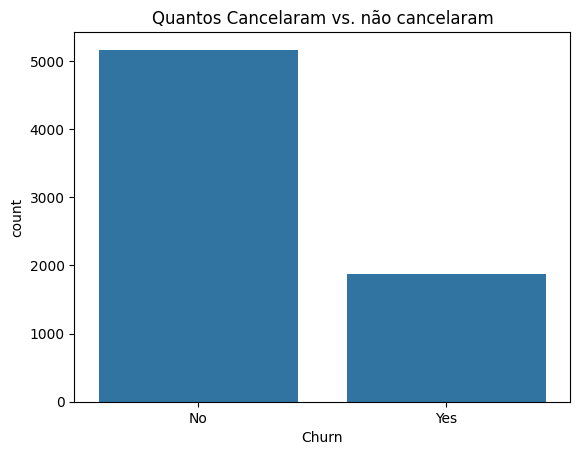

In [13]:
sns.countplot(x='Churn', data=df)
plt.title('Quantos Cancelaram vs. não cancelaram')
plt.show()

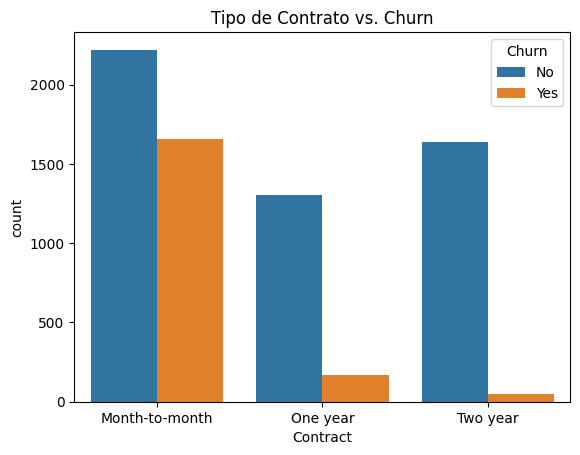

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Tipo de Contrato vs. Churn')
plt.show()

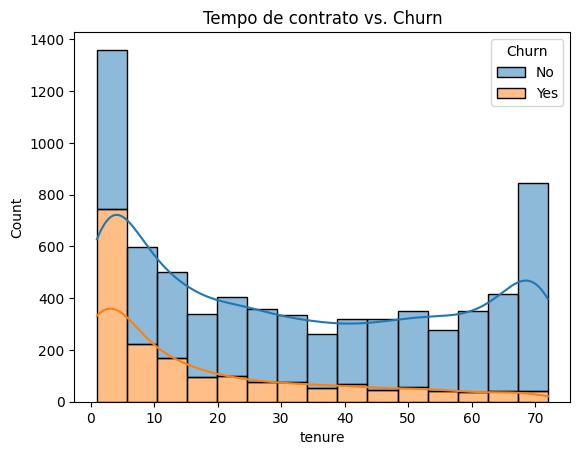

In [15]:
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple='stack')
plt.title('Tempo de contrato vs. Churn')
plt.show()

# 3. Pré-processamento

Precisamos transformar todos os dados do tipo texto (como, "sim" e "não") em 0s e 1s para que possamos trabalhar com eles.


Vamos remover a coluna ID, já que ela não é útil para o nosso modelo

In [16]:
df = df.drop('customerID', axis=1)

Vamos usar o 'get_dummies' para coverter todas as colunas de texto restante (marcadas como tipo 'Object'), para colunas númericas

In [18]:
df_processado = pd.get_dummies(df, drop_first=True)
df_processado.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


Vamos verificar os tipos agora

In [21]:
df_processado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

Agora vamos fazer a separação dos dados, alvo e previsores (X e y)

O que queremos prever é se o cliente cancelou, então nossa coluna alvo é a "Churn_Yes".

In [23]:
y = df_processado['Churn_Yes']
X = df_processado.drop('Churn_Yes', axis=1)

Agora vamos dividir o X e o y em conjuntos de treino e teste

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(5625, 30)
(1407, 30)


#4. Modelagem

Antes de treinar, vamos primeiro escalonar os dados, para mantes os dados na mesma escala

In [28]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Com os dados escalonados, podemos treinar o modelo

Vamos usar o 'max_iter=1000' para garantir que o modelo tenha tentativas suficientes para encontrar a melhor solução

In [29]:
modelo = LogisticRegression(max_iter=1000)

modelo.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# 5. Avaliação

Vamos primeiro usar o modelo treinado para fazer previsões nos dados de teste e depois comparar  com os valores reais

In [38]:
previsoes = modelo.predict(X_test)

acc = accuracy_score(y_test, previsoes) *100
print(f"Acurácia: {acc:.2f}%\n")

Acurácia: 78.75%



Matriz de Confusão

In [39]:
print(confusion_matrix(y_test, previsoes))

[[915 118]
 [181 193]]


Relatório de Classificação

In [42]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

